In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

### Process CSV files into Dataframe

In [28]:
dat_2og = pd.read_csv("data/out2core.csv", header=0, usecols=range(1,6))
dat_2og.head()

,query_number,driver-memory,executor-memory,spark.executor.extraJavaOptions=-XX:,runtime
0,q_02,3,2,+UseParallelGC,34.645
1,q_05,2,2,+UseParallelGC,40.037
2,q_01,2,4,+UseParallelGC,32.401
3,q_05,4,4,+UseParallelGC,40.747
4,q_02,3,4,+UseG1GC,34.123


Need to add results from queries 7-9 for 2 cores

In [124]:
dat_2ogp2 = pd.read_csv("data/out_2core_part2.csv", header=0)

dat_2ohp2 = pd.read_csv("data/out_onehot_2core_part2.csv", header=0).drop("Unnamed: 0", axis=1)
dat_2ohp2["num_cores"] = 2
dat_2ohp2["time"] = dat_2ogp2.runtime
dat_2ohp2.head()

,query_number_q_07,query_number_q_08,query_number_q_09,driver-memory,executor-memory,spark.executor.extraJavaOptions=-XX:_+UseG1GC,spark.executor.extraJavaOptions=-XX:_+UseParallelGC,num_cores,time
0,1,0,0,2,2,0,1,2,23.537
1,1,0,0,2,2,1,0,2,21.968
2,1,0,0,2,7,0,1,2,21.411
3,1,0,0,2,7,1,0,2,22.255
4,1,0,0,2,8,0,1,2,21.381


In [29]:
dat_2oh = pd.read_csv("data/out_onehot2core.csv", header=0).drop("Unnamed: 0", axis=1)
dat_2oh["num_cores"] = 2
dat_2oh["time"] = dat_2og.runtime
dat_2oh.head()

,query_number_q_01,query_number_q_02,query_number_q_03,query_number_q_04,query_number_q_05,query_number_q_06,driver-memory,executor-memory,spark.executor.extraJavaOptions=-XX:_+UseG1GC,spark.executor.extraJavaOptions=-XX:_+UseParallelGC,num_cores,time
0,0,1,0,0,0,0,3,2,0,1,2,34.645
1,0,0,0,0,1,0,2,2,0,1,2,40.037
2,1,0,0,0,0,0,2,4,0,1,2,32.401
3,0,0,0,0,1,0,4,4,0,1,2,40.747
4,0,1,0,0,0,0,3,4,1,0,2,34.123


In [131]:
dat_2 = dat_2oh.merge(dat_2ohp2, how='outer')
dat_2 = dat_2.fillna(0)
dat_2.head()

,query_number_q_01,query_number_q_02,query_number_q_03,query_number_q_04,query_number_q_05,query_number_q_06,driver-memory,executor-memory,spark.executor.extraJavaOptions=-XX:_+UseG1GC,spark.executor.extraJavaOptions=-XX:_+UseParallelGC,num_cores,time,query_number_q_07,query_number_q_08,query_number_q_09
0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,0,1,2,34.645,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,2,2,0,1,2,40.037,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,2,4,0,1,2,32.401,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,4,4,0,1,2,40.747,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,3,4,1,0,2,34.123,0.0,0.0,0.0


In [132]:
dat_4og = pd.read_csv("data/out4core.csv", header=0)
dat_4 = pd.read_csv("data/out_onehot4core.csv", header=0).drop("Unnamed: 0", axis=1)
'''
dat_4 = dat_4.loc[dat_4.query_number_q_07 == 0]
dat_4 = dat_4.drop("query_number_q_07", axis=1)

dat_4 = dat_4.loc[dat_4.query_number_q_08 == 0]
dat_4 = dat_4.drop("query_number_q_08", axis=1)

dat_4 = dat_4.loc[dat_4.query_number_q_09 == 0]
dat_4 = dat_4.drop("query_number_q_09", axis=1)
'''

dat_4["num_cores"] = 4
dat_4["time"] = dat_4og.runtime
dat_4.head()

,query_number_q_01,query_number_q_02,query_number_q_03,query_number_q_04,query_number_q_05,query_number_q_06,query_number_q_07,query_number_q_08,query_number_q_09,driver-memory,executor-memory,spark.executor.extraJavaOptions=-XX:_+UseG1GC,spark.executor.extraJavaOptions=-XX:_+UseParallelGC,num_cores,time
0,1,0,0,0,0,0,0,0,0,2,2,0,1,4,33.008
1,1,0,0,0,0,0,0,0,0,2,2,1,0,4,33.365
2,1,0,0,0,0,0,0,0,0,2,7,0,1,4,33.171
3,1,0,0,0,0,0,0,0,0,2,7,1,0,4,33.434
4,1,0,0,0,0,0,0,0,0,2,8,0,1,4,33.889


**Need to remove one column from each categorical to make it not perfectly linear. Removing GC-Alg-G1C1 and keeping all query columns.**

In [150]:
include2 = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14]
include4 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]
temp_2 = dat_2.iloc[:,include2]
temp_4 = dat_4.iloc[:,include4]
all_df = pd.concat([temp_2, temp_4])
columns = ["driver-memory", "executor-memory", "num_cores", "q_01", "q_02", "q_03", "q_04", "q_05", "q_06", "q_07", "q_08", "q_09", "gc-alg-parallel", "time"]
all_df.columns = columns
all_df.head()

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel,time
0,3,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34.645
1,2,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,40.037
2,2,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,32.401
3,4,4,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,40.747
4,3,4,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,34.123


### Visualization

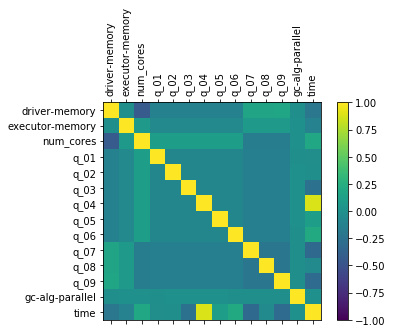

In [152]:
correlations = all_df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(columns)
ax.set_xticklabels(columns)
plt.xticks(rotation=90)
plt.show()

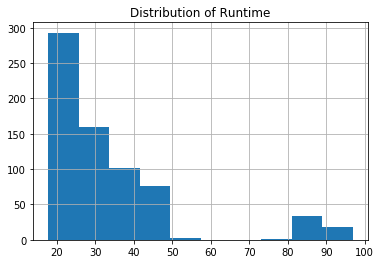

In [182]:
all_df.time.hist()
plt.title("Distribution of Runtime")
plt.show()

In [154]:
all_df.loc[all_df.time > 70] # all query #4!!!

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel,time
16,4,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,94.571
27,2,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,90.965
29,3,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,90.358
32,4,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,92.570
39,2,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,90.456
40,4,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,93.313
47,3,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,94.213
50,3,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,93.826
53,3,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,92.468
55,4,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,91.565


Box-Cox transformation

In [155]:
df_no4 = all_df.loc[all_df.q_04 == 0]
df_no4 = df_no4.drop("q_04", axis=1)
df_no4.head()

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel,time
0,3,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34.645
1,2,2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,40.037
2,2,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,32.401
3,4,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,40.747
4,3,4,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,34.123


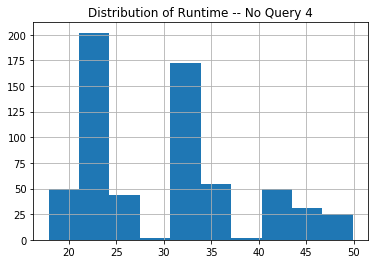

In [156]:
df_no4.time.hist()
plt.title("Distribution of Runtime -- No Query 4")
plt.show()

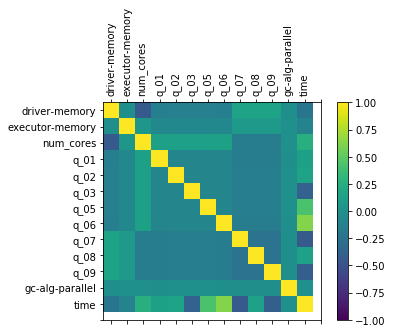

In [158]:
correlations = df_no4.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(df_no4.columns)
ax.set_xticklabels(df_no4.columns)
plt.xticks(rotation=90)
plt.show()

See if we can transform Y to be more bell-shaped.

[-1.23263902]


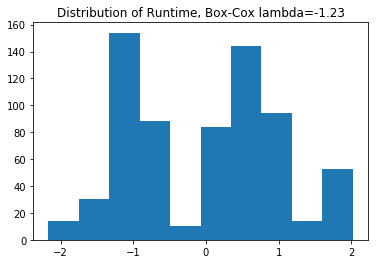

In [202]:
temp_y = all_df.time.values.reshape(len(all_df), 1)
# https://www.isixsigma.com/tools-templates/normality/making-data-normal-using-box-cox-power-transformation/
bc = preprocessing.PowerTransformer(method='box-cox', standardize=True) # NOTE! only works with sklearn 0.2+
bc_y = bc.fit_transform(temp_y)
print(bc.lambdas_)

plt.hist(bc_y)
plt.title("Distribution of Runtime, Box-Cox lambda=-1.23")
plt.show()

**_Not going to use Box-Cox for now_**

#### Split Train and Test

In [236]:
rs = np.random.RandomState(seed=1)
df = all_df
X = df.iloc[:,:-1]
y = df['time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rs, ) # 80/20 split!

## Linear Regression

In [237]:
# fitting intercept = False because included all query columns!
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print(reg.score(X_train, y_train))
y_pred_reg = reg.predict(X_test)
mean_squared_error(y_test, y_pred_reg)

0.9912331537639498


4.626772108501704

In [188]:
c = pd.DataFrame(reg.coef_)
c = c.T
c.columns = X_train.columns
c

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel
0,-0.047801,-0.070786,0.205121,33.407617,33.901333,19.771049,85.849939,41.055693,46.444457,22.745535,32.359998,23.272099,0.022775


_These numbers actually don't mean anything since we violated the Linear Regression assumptions! But will still include them for funsies_

## LASSO

In [199]:
lasso = Lasso(random_state=rs, alpha=0.1).fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.coef_)
print
y_pred_lasso = lasso.predict(X_test)
mean_squared_error(y_test, y_pred_lasso)

0.9882794304155615
[ -0.15373312  -0.11440354   0.29873967   0.           0.
 -12.05406842  51.36046757   6.73207376  12.00099551  -9.5340809
  -0.          -8.99948802  -0.        ]


6.361396433121195

## Random Forest

In [200]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rf = RandomForestRegressor(random_state=rs)
rf.fit(X_train, y_train)

s = pd.DataFrame((rf.feature_importances_))
s = s.T
s.columns = X_train.columns

s

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel
0,0.000743,0.001474,0.006141,0.029569,0.026453,0.002189,0.761856,0.053784,0.090789,0.000087,0.026414,0.000076,0.000426


In [201]:
y_pred_rf = rf.predict(X_test)
mean_squared_error(y_test, y_pred_rf)

1.0133968913868598

--------

# With Box-Cox Time (y)

In [238]:
rs = np.random.RandomState(seed=1)
df = all_df
X = df.iloc[:,:-1]
y = bc_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rs, ) # 80/20 split!

## Linear Regression

In [239]:
# fitting intercept = False because included all query columns!
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print(reg.score(X_train, y_train))
y_pred_reg = reg.predict(X_test)
mean_squared_error(y_test, y_pred_reg)

0.9836460159640553


0.017493425095054728

In [211]:
c = pd.DataFrame(reg.coef_)
c.columns = X_train.columns
c # coefficients of the linear regression model

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel
0,0.001177,-0.005755,0.096208,0.112013,0.168764,-1.853287,1.617806,0.609374,0.847788,-1.170098,0.087192,-1.072038,0.006846


_Be careful when looking at these numbers! You have to think of them in terms of the Box-Cox values now_

## LASSO

In [218]:
lasso = Lasso(random_state=rs, alpha=0.05).fit(X_train, y_train) # note, low alpha --> more like regular LR
print(lasso.score(X_train, y_train))
print(lasso.coef_)
print
y_pred_lasso = lasso.predict(X_test)
mean_squared_error(y_test, y_pred_lasso)

0.8278058665307034
[-0.0278585  -0.01278618  0.10799543  0.          0.         -1.3475388
  0.79163539  0.          0.04215731 -0.95605209  0.         -0.85268012
 -0.        ]


0.20338276394378824

## Random Forest

In [219]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rf = RandomForestRegressor(random_state=rs)
rf.fit(X_train, y_train)

s = pd.DataFrame((rf.feature_importances_))
s = s.T
s.columns = X_train.columns

s

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel
0,0.002799,0.002893,0.016351,0.000061,0.000076,0.166039,0.314759,0.018253,0.057597,0.187359,0.001318,0.231522,0.000973


In [220]:
y_pred_rf = rf.predict(X_test)
mean_squared_error(y_test, y_pred_rf)

0.011949791897507011

----------

## Only Query 4

Examine only one query instead of all of them.

In [240]:
only4 = all_df.loc[all_df.q_04 == 1]

for i in range(1, 10):
    only4 = only4.drop("q_0" + str(i), axis=1)

df = only4
X = df.iloc[:,:-1]
y = only4.time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rs, ) # 80/20 split!

## Linear Regression

In [242]:
# fitting intercept = False because included all query columns!
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print(reg.score(X_train, y_train))
y_pred_reg = reg.predict(X_test)
mean_squared_error(y_test, y_pred_reg)

-10.747882966385003


502.14140784792977

In [243]:
c = pd.DataFrame(reg.coef_)
c = c.T
c.columns = X_train.columns
c

,driver-memory,executor-memory,num_cores,gc-alg-parallel
0,16.756011,2.791627,6.29895,2.544678


Random Forest

In [244]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rf = RandomForestRegressor(random_state=rs)
rf.fit(X_train, y_train)

s = pd.DataFrame((rf.feature_importances_))
s = s.T
s.columns = X_train.columns

s

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,driver-memory,executor-memory,num_cores,gc-alg-parallel
0,0.053608,0.045065,0.884717,0.01661


In [245]:
y_pred_rf = rf.predict(X_test)
mean_squared_error(y_test, y_pred_rf)

3.987370410000011

## Only Query 3

In [248]:
only3 = all_df.loc[all_df.q_03 == 1]

for i in range(1, 10):
    only3 = only3.drop("q_0" + str(i), axis=1)

df = only3
X = df.iloc[:,:-1]
y = only3.time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rs, ) # 80/20 split!

## Linear Regression

In [249]:
# fitting intercept = False because included all query columns!
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print(reg.score(X_train, y_train))
y_pred_reg = reg.predict(X_test)
mean_squared_error(y_test, y_pred_reg)

-6.7893695859890215


9.633485607689671

In [250]:
c = pd.DataFrame(reg.coef_)
c = c.T
c.columns = X_train.columns
c

,driver-memory,executor-memory,num_cores,gc-alg-parallel
0,2.71538,0.372862,2.758806,1.35516


Random Forest

In [251]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rf = RandomForestRegressor(random_state=rs)
rf.fit(X_train, y_train)

s = pd.DataFrame((rf.feature_importances_))
s = s.T
s.columns = X_train.columns

s

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,driver-memory,executor-memory,num_cores,gc-alg-parallel
0,0.193896,0.099004,0.65046,0.05664


In [252]:
y_pred_rf = rf.predict(X_test)
mean_squared_error(y_test, y_pred_rf)

0.29082356545454496